In [2]:
from datetime import date, datetime, time, timedelta
import pysrt
from textblob import TextBlob
import matplotlib 
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(16.0,9.0)
style.use('fivethirtyeight')

In [3]:
file='/people/berhe/Bureau/Project/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt'
subs=pysrt.open(file,encoding='iso-8859-1')

In [4]:
len(subs)

642

In [3]:
def create_intervals(start, end, delta):
    current=start
    while current<=end:
        current=(datetime.combine(date.today(),current)+delta).time()
        yield current

In [4]:
def sentiment_anal(file='/people/berhe/Bureau/Project/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt', delta=2):
    subs=pysrt.open(file,encoding='iso-8859-1')
    n=len(subs)
    intervals=[]
    start=time(0,0,0)
    end=subs[-1].end.to_time()
    delta=timedelta(minutes=delta)
    for results in create_intervals(start, end, delta):
        intervals.append(results)
        
    sentiments=[]
    index=0
    m=len(intervals)
    for i in range(m):
        text=""
        for j in range(index,n):
            if subs[j].end.to_time()<intervals[i]:
                text+=subs[j].text_without_tags + " "
            else:
                break
        blob=TextBlob(text)
        pol=blob.sentiment.polarity
        sentiments.append(pol)
        index =j
    intervals.insert(0,time(0,0,0))
    sentiments.insert(0,0.0)
    #for k in range(0,n):
        #print(intervals[k])
        #print(subs[k].text)
    return (intervals, sentiments,text)

In [5]:
_,_,bl=sentiment_anal('/people/berhe/Bureau/Project/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt')

In [6]:
strings=bl.encode('ascii', 'ignore').decode('ascii')

In [7]:
import nltk

In [8]:
tokens=nltk.word_tokenize(bl,language='english',preserve_line=False)

In [9]:
tokens

[u'Come',
 u'on',
 u',',
 u'you',
 u'.',
 u'(',
 u'Whines',
 u')',
 u'(',
 u'Grunts',
 u')',
 u'(',
 u'Barks',
 u'softly',
 u')',
 u'(',
 u'Woman',
 u'gasping',
 u')',
 u'(',
 u'Woman',
 u'moaning',
 u')',
 u'(',
 u'Grunting',
 u',',
 u'moaning',
 u')',
 u'(',
 u'Gaage',
 u')',
 u'-',
 u'Stopl',
 u'Stop',
 u'.',
 u'-',
 u'(',
 u'Gash',
 u')',
 u'Are',
 u'you',
 u'completh',
 u'mad',
 u'?',
 u'-',
 u'He',
 u'saw',
 u'us',
 u'.',
 u'-',
 u'It',
 u"'s",
 u'all',
 u'\xef\xac\x81ght',
 u',',
 u'it',
 u"'s",
 u'all',
 u'right',
 u'.',
 u'-',
 u'It',
 u"'s",
 u'all',
 u'right',
 u'.',
 u'-',
 u'He',
 u'saw',
 u'usl',
 u'I',
 u'heard',
 u'you',
 u'the',
 u'\xef\xac\x81rst',
 u'time',
 u'.',
 u'(',
 u'Whimpers',
 u')',
 u'Quite',
 u'the',
 u'little',
 u'climber',
 u',',
 u'are',
 u"n't",
 u'you',
 u'?',
 u'-',
 u'How',
 u'old',
 u'are',
 u'you',
 u',',
 u'boy',
 u'?',
 u'-',
 u'Ten',
 u'.',
 u'Ten',
 u'.',
 u'-',
 u'The',
 u'things',
 u'I',
 u'do',
 u'for',
 u'love',
 u'.',
 u'-',
 u'(',
 u'Gas

In [10]:
tagged=nltk.pos_tag(tokens)

In [11]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [12]:
tagged[0:4]

[(u'Come', 'NNP'), (u'on', 'IN'), (u',', ','), (u'you', 'PRP')]

In [13]:
for tag in tagged:
    if tag[1] in ['NNPS','NNP']:
        print (tag)

In [14]:
entities=nltk.chunk.ne_chunk(tagged)

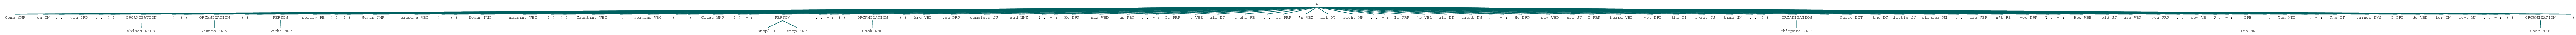

In [15]:
entities

In [16]:
names=bl

In [17]:
for n in names:
    print n

In [ ]:
entities=nltk.chunk.ne_chunk(names)

In [48]:
strings=[]
for i in bl.sentences:
    strings.append(i.encode('utf-8').strip())
len(strings)

AttributeError: 'Sentence' object has no attribute 'encode'

In [35]:
strings

['C',
 'o',
 'm',
 'e',
 '',
 'o',
 'n',
 ',',
 '',
 'y',
 'o',
 'u',
 '.',
 '',
 '(',
 'W',
 'h',
 'i',
 'n',
 'e',
 's',
 ')',
 '',
 '(',
 'G',
 'r',
 'u',
 'n',
 't',
 's',
 ')',
 '',
 '(',
 'B',
 'a',
 'r',
 'k',
 's',
 '',
 's',
 'o',
 'f',
 't',
 'l',
 'y',
 ')',
 '',
 '(',
 'W',
 'o',
 'm',
 'a',
 'n',
 '',
 'g',
 'a',
 's',
 'p',
 'i',
 'n',
 'g',
 ')',
 '',
 '(',
 'W',
 'o',
 'm',
 'a',
 'n',
 '',
 'm',
 'o',
 'a',
 'n',
 'i',
 'n',
 'g',
 ')',
 '',
 '(',
 'G',
 'r',
 'u',
 'n',
 't',
 'i',
 'n',
 'g',
 ',',
 '',
 'm',
 'o',
 'a',
 'n',
 'i',
 'n',
 'g',
 ')',
 '',
 '(',
 'G',
 'a',
 'a',
 'g',
 'e',
 ')',
 '',
 '-',
 '',
 'S',
 't',
 'o',
 'p',
 'l',
 '',
 'S',
 't',
 'o',
 'p',
 '.',
 '',
 '-',
 '',
 '(',
 'G',
 'a',
 's',
 'h',
 ')',
 '',
 'A',
 'r',
 'e',
 '',
 'y',
 'o',
 'u',
 '',
 'c',
 'o',
 'm',
 'p',
 'l',
 'e',
 't',
 'h',
 '',
 'm',
 'a',
 'd',
 '?',
 '',
 '-',
 '',
 'H',
 'e',
 '',
 's',
 'a',
 'w',
 '',
 'u',
 's',
 '.',
 '',
 '-',
 '',
 'I',
 't',
 "'",
 's',
 '

In [18]:
import nltk
tokens=nltk.word_tokenize(bl.sentences)
tagged=nltk.pos_tag(tokens)
ent=nltk.chunk.ne_chunk(tagged)

AttributeError: 'unicode' object has no attribute 'sentences'

In [7]:
def average_sentiment(y):
    avg=float(sum(y))/len(y)
    return avg

(Gate rumbling, chains rattling)
(Horse snorts)
(Rumbling, chain rattling)
(Wind whistling)
- Easy, boy.
- (Grunts)
(Horse whinnies)
(Man) What do you expect?
They're savages.
One lot steals a goat from another lot,
before you know it
they're ripping each other to pieces.
I've never seen wildlings do a thing like this.
I never seen a thing like this,
not ever in my life.
- (Horse snorts)
- How close did you get?
- Close as any man would.
- We should head back to the Wall.
Do the dead frighten you?
Our orders were to track the wildlings.
We tracked them.
They wonât trouble us no more.
You donât think he'll ask us how they died?
Get back on your horse.
(Sighs, mutters)
Whatever did it to them
could do it to us.
They even killed the children.
It's a good thing we're not children.
You want to run away south,
run away.
Of course,
they will behead you as a deserter.
If I don't catch you ï¬rst.
Get back on your horse.
I won't say it again.
(Shrill animal ll)
Your dead men seem
to have mo

Text(0.5,1,u'Avg Sen 0.1269')

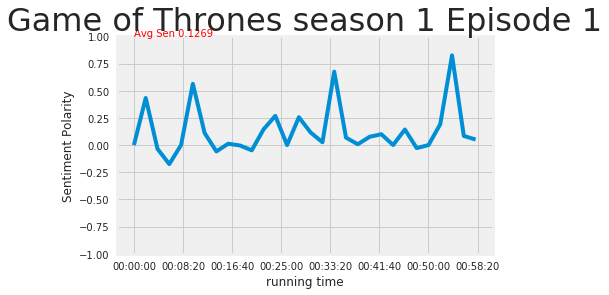

In [10]:
x,y=sentiment_anal('/people/berhe/Bureau/Project/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt')
fig,ax=plt.subplots(squeeze=False)
plt.plot(x,y)
plt.title("Game of Thrones season 1 Episode 1",fontsize=32)
plt.ylim((-1,1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("running time")
plt.text(.5, 1.00, "Avg Sen " + str(round(average_sentiment(y),4)),color="red")
#ttl=ax.title
#ttl.set_position(.5, 1.05)